In [1]:
import os
import sys
sys.path.append('../')
import spikeoutputs as so
import spikeplots as sp

In [2]:
str_experiment = '20230523C'
str_algo = 'kilosort2'
str_chunk = 'chunk5'

str_analysis_dir = '/Volumes/Vyom MEA/analysis/'
str_exp_dir = os.path.join(str_analysis_dir, str_experiment, str_chunk, str_algo)
str_class = '20230523C_vr_20230631_kilosort2.classification.txt'
str_params = 'kilosort2.params'

d_paths = {'str_experiment': str_experiment, 'paramsfile': os.path.join(str_exp_dir, str_params), 
           'dataset_name': str_algo, 'str_protocol': 'noise', 
           'str_classification': os.path.join(str_exp_dir, str_class), 'str_chunk': str_chunk}
data = so.SpikeOutputs(**d_paths)
data.load_sta()

In [3]:
data.types.print_summary(b_only_main_types=True)

Total number of cells: 662
Number of OffP: 107
Number of OffM: 108
Number of OnP: 86
Number of OnM: 103
Number of SBC: 69


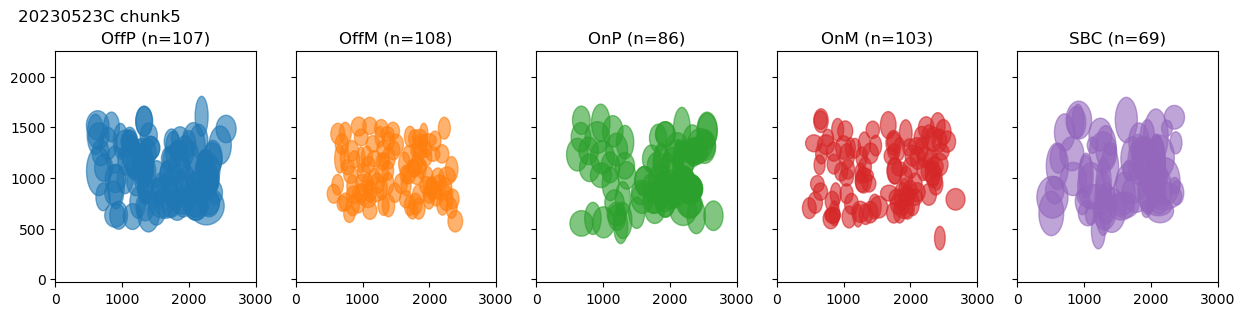

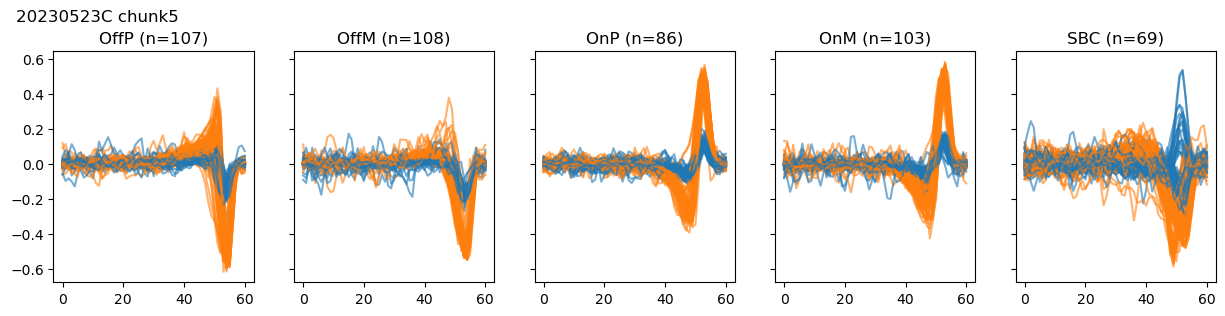

In [4]:
axs = sp.plot_type_rfs(data)
axs = sp.plot_type_tcs(data)

In [5]:
from scipy.io import loadmat
str_matfile = '/Volumes/data-1/data/sorted/20230523C/chunk5/kilosort2/kilosort2_params.mat'

matdata = loadmat(str_matfile)
matdata.keys()

dict_keys(['__header__', '__version__', '__globals__', 'cluster_id', 'spike_count', 'acf', 'isi', 'timecourse_matrix', 'spatial_maps', 'significance_maps', 'hull_area', 'hull_vertices', 'hull_parameters', 'rank1_r2', 'x_bin', 'y_bin'])

In [8]:
matdata['hull_vertices'].shape

(819, 50, 2)

In [72]:
# I guess it's the x, y coordinates of 50 points on the convex hull of the RF.

import numpy as np
import matplotlib.pyplot as plt
import celltype_io as ctio

# Get index of OnP cells
cell_ids = data.types.d_main_IDs['OnP']

cell_idxs = ctio.map_ids_to_idx(cell_ids, data.ARR_CELL_IDS)

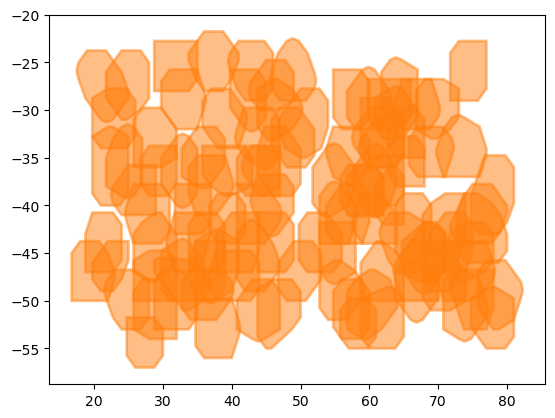

In [30]:
for idx_cell in cell_idxs:
    # Remove 0,0 points and plot closed polygon
    x = matdata['hull_vertices'][idx_cell, :, 0]
    y = matdata['hull_vertices'][idx_cell, :, 1]
    y = -y
    # Remove points where both x and y are 0
    idx_nonzero = np.argwhere((x != 0) & (y != 0))[:,0]
    x = x[idx_nonzero]
    y = y[idx_nonzero]

    plt.fill(x, y, fill=True, alpha=0.5, edgecolor='k', linewidth=2, color='C1')

## Try plotting spatial maps of a given type all together

/var/folders/pt/ln41qs8d7vd36z1sgbgljbn00000gn/T/ipykernel_19148/3201733563.py:12: UserWarning: No contour levels were found within the data range.
  plt.contour(sm, levels=[-0.01], colors='k', linewidths=1, linestyles='solid', alpha=0.5)


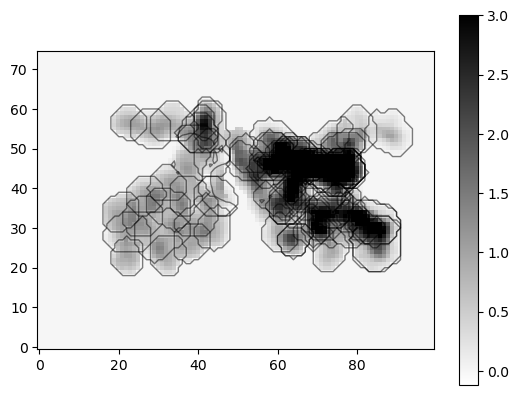

In [75]:
mosaic = np.zeros((75, 100))
for idx_cell in cell_idxs:
    
    sm = matdata['spatial_maps'][idx_cell, :, :, 0].copy()
    sig = matdata['significance_maps'][idx_cell, :, :].copy()

    # Keep only significant pixels
    sm[sig == 0] = 0

    mosaic += sm
    # Plot boundary of each cell's significant pixels with solid black line
    plt.contour(sm, levels=[-0.01], colors='k', linewidths=1, linestyles='solid', alpha=0.5) 
    # break

plt.imshow(mosaic, cmap='gray_r', origin='lower', vmax=3)
plt.colorbar()